In [213]:
#Import the all nessesary libraries:-
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn 
%matplotlib inline

`Read the data-set:-`

In [214]:
data=pd.read_csv("advertising.csv")
print(data.shape)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [215]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [216]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [218]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [219]:
data.duplicated().any()

False

## 1] EDA

**1.1 Check Corr:-**

In [220]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

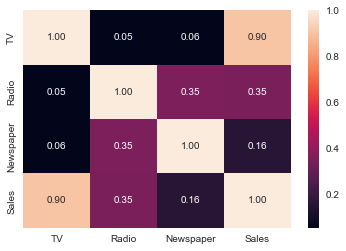

In [221]:
sns.heatmap(data.corr(),annot=True,fmt=".2f")

So we have a good corr values for our  target columns `[Sales]`. 

**1.2 Relation:-**

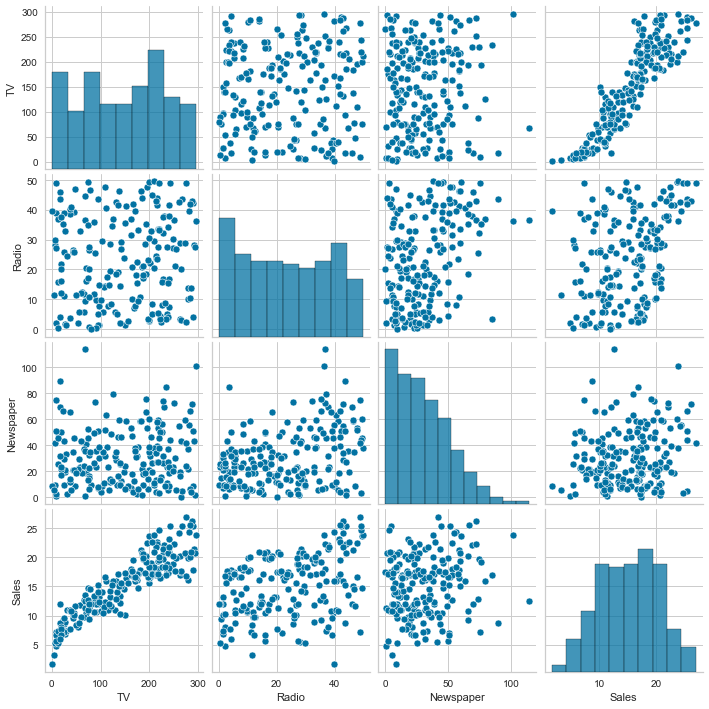

In [222]:
sns.pairplot(data)

**1.3 ]  Checking For Outliers**

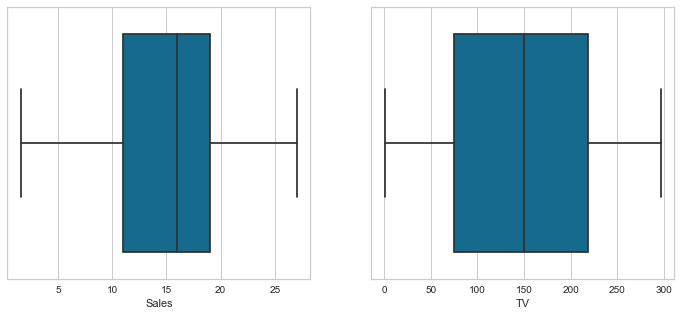

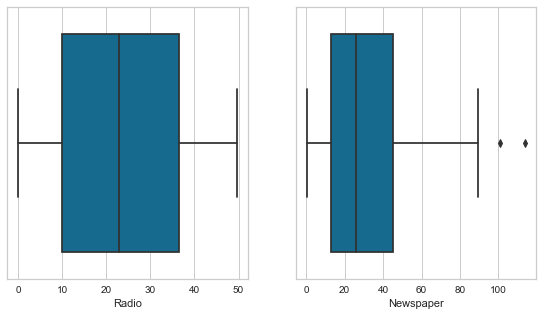

In [223]:
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)

sns.boxplot(x='Sales',data=data,orient='h')
plt.subplot(1,4,2)
sns.boxplot(x='TV',data=data,orient='h')
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
sns.boxplot(x='Radio',data=data,orient='h')
plt.subplot(1,5,2)
sns.boxplot(x='Newspaper',data=data,orient='h')
plt.show;

`Infernces:-`
* In the data we have the some Outliers , but we not handle this because the data quantity is less & it affects negatively on the data 

**1.4 Check Skewness:-

TV
-0.06932836662244649


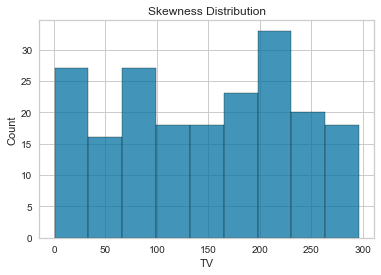

Radio
0.0934668451108453


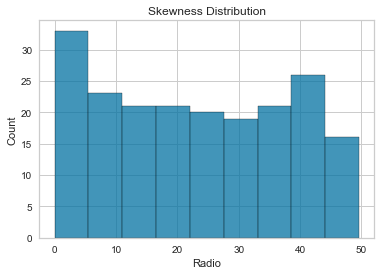

Newspaper
0.8879959753085498


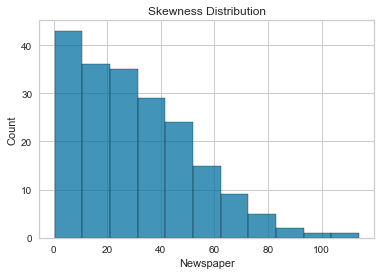

Sales
-0.0731850348821409


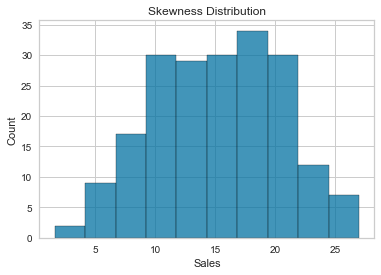

In [224]:
from scipy.stats import skew

for i in data:
    print(i)
    print(skew(data[i]))
    
    sns.histplot(data[i])
    plt.title("Skewness Distribution")
    plt.show()

**Inference:-**

* The average sales (which is 15) is the most frequent

* `Radio`  and `Newspaper` skew acceptable or possitve skew *-


* and for others we can't handle beacuse it distributed towards negative and positive.*-

  i.e log(negative) returns `nan`  so it create an error in data-set.

## Regression :

## 2] Check For Which Regression  :

**2.1 ]  Plot pair plot**

In [225]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


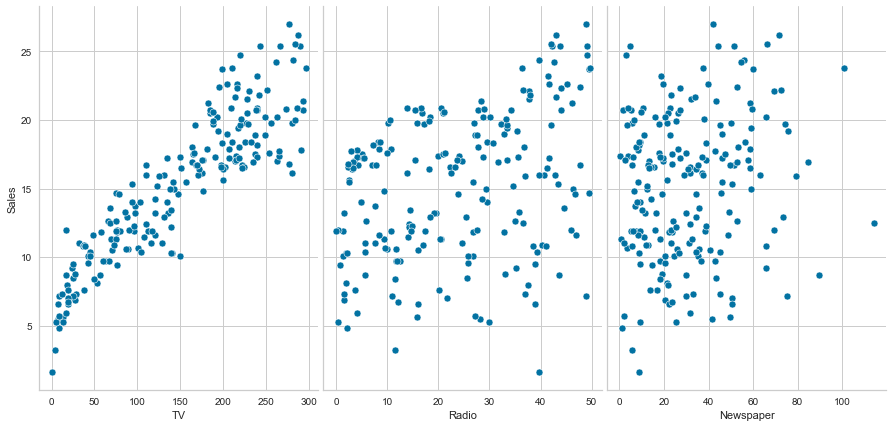

In [226]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=6, aspect=0.7)

**`Inference:`** 
*  As we can see in the pair plot, `TV` are directly proportional to the investment or `Sales`.
* Other parameters also have linear relation with target columns

## 3] Model Selection  :
* Linear Single Regression 

**1.1] Seletion of X and y Parameters**

In [227]:
#lets start regression analysis:

X=data['TV'].values.reshape(-1,1)
y=data['Sales'].values

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


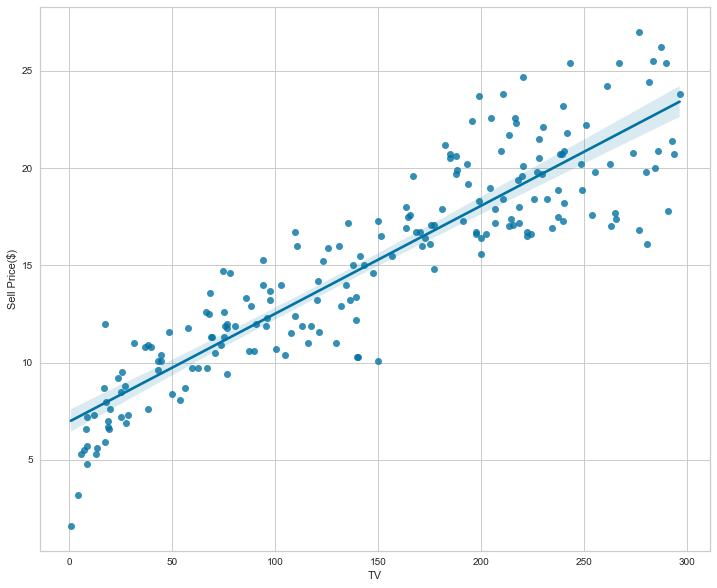

In [228]:
plt.figure(figsize=(12,10))
sns.regplot(X,y)
plt.xlabel("TV")
plt.ylabel("Sell Price($)")
plt.show()

In [229]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [230]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [231]:
model.fit(X_train,y_train)

LinearRegression()

In [232]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

### 2] Check Regrssion Assumption

**2.1] homoskedacity** : varriance is kept constant

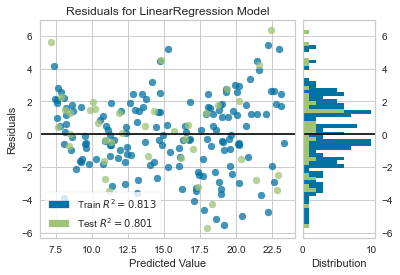

In [233]:
from yellowbrick.regressor import ResidualsPlot
residuals =ResidualsPlot(model)
residuals .fit(X_train,y_train)
residuals .score(X_test,y_test)

plt.legend(loc='upper left')
residuals .show();

**`Inferences:`**
   
* from Predicted  vs Residuals plot we dont see any type of pattern in error terms , so our varrince is constant

**2.2] Normal-distribution :** error terms are normally distributes that is error terms should follow  the bell curve*- 

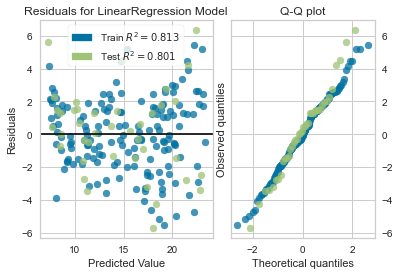

In [234]:
plot_visuals=ResidualsPlot(model, hist=False , qqplot=True)
plot_visuals.fit(X_train,y_train)
plot_visuals.score(X_test,y_test) 
plot_visuals.show();

In [235]:
df = pd.DataFrame(data={'Predicted value':y_test.flatten(),'Actual Value':y_test_pred.flatten()})
df

,Predicted value,Actual Value
0,11.3,10.929130
1,8.4,9.883991
2,12.0,12.083137
3,25.4,22.931893
4,16.7,16.426994
5,8.7,10.221484
6,7.2,7.635854
7,18.2,20.231952
8,9.2,8.457812
9,16.6,17.918494


In [236]:
model.coef_

array([0.0544343])

model.intercept_

In [237]:
print("The my best fit line Equation is: {} *'R&D Spend'  +  {}".format(model.coef_ ,model.intercept_))

The my best fit line Equation is: [0.0544343] *'R&D Spend'  +  7.162275968528904


#### 3] Performance Major  :
___Evaluation metrics are used to measure the quality of the statistical or machine learning model.

**3.1] Mean Squared Error**

In [238]:
from sklearn.metrics import *
print("Mean_squared_error")
print("For_train :",mean_squared_error(y_train,y_train_pred))
print("For_test:",mean_squared_error(y_test,y_test_pred))
      


Mean_squared_error
For_train : 4.873755712925826
For_test: 6.6390912265593


**3.2] Mean_absolute_error**

In [239]:
print("Mean_absolute_error")      
print("For_train :",mean_absolute_error(y_train,y_train_pred))
print("For_test:",mean_absolute_error(y_test,y_test_pred))

Mean_absolute_error
For_train : 1.7878428063044312
For_test: 2.014867314759479


**3.3] r2_score**

In [240]:
from sklearn.metrics import *
Train_score_single=r2_score(y_train,y_train_pred)

Test_score_single=r2_score(y_test,y_test_pred)
print("The r2_score for train :",Train_score_single)
      
print("The r2_score for test :",Test_score_single)

The r2_score for train : 0.8134588121404831
The r2_score for test : 0.8010943934328407


##### `Conclusion:` 80.10 % of the data fit the regression model 

### 4]  cross validation  :

**4.1] For test &  Train Values Normal** 

In [241]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=LinearRegression()
fold=KFold(n_splits=5,shuffle=True, random_state=15)
train_scores=cross_val_score(model,X_train,y_train,scoring='r2',cv=fold)
print("Train_score:",train_scores)

accuracy_fold_train_s=np.mean(abs(train_scores))
print("accuracy_fold_train:",accuracy_fold_train_s)

test_scores=cross_val_score(model,X_test,y_test,scoring='r2',cv=fold)
print("Test_score \n :",test_scores)

accuracy_fold_test_s=np.mean(abs(test_scores))
print("accuracy_fold_test:",accuracy_fold_test_s)

Train_score: [0.81533003 0.79972754 0.80350998 0.82901288 0.74562446]
accuracy_fold_train: 0.7986409770268039
Test_score 
 : [0.61965826 0.79945864 0.89523126 0.78770672 0.78322471]
accuracy_fold_test: 0.7770559183258372


## 5 Regularization :


**5.1] Reqularization with Lassso**

In [242]:
from sklearn import linear_model

l1=linear_model.Lasso(alpha=50,max_iter=200,tol=0.1)
l1.fit(X_train,y_train)

Lasso_test_s=l1.score(X_test,y_test)
Lasso_train_s=l1.score(X_train,y_train)

print("Lasso Regularization Method")

print("lasso_train_score\n{} ".format(Lasso_train_s))
print("lasso_test_score\n {} ".format(Lasso_test_s))

Lasso Regularization Method
lasso_train_score
0.8001183242090301 
lasso_test_score
 0.7733442561672152 


**5.1.1] CV with Lassso**

In [243]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True, random_state=15)
train_scores=cross_val_score(l1,X_train,y_train,scoring='r2',cv=fold)
print("Train_score \n:",train_scores )

Lasso_cv_train=np.mean(abs(train_scores))
print("  accuracy_fold_train \n:",Lasso_cv_train)

test_scores=cross_val_score(l1,X_test,y_test,scoring='r2',cv=fold)
print("Test_score \n:",train_scores )


Lasso_cv_test=np.mean(abs(test_scores))
print("accuracy_fold_test \n :",Lasso_cv_test)

Train_score 
: [0.77373666 0.80660328 0.792325   0.80257385 0.75754294]
  accuracy_fold_train 
: 0.7865563452133757
Test_score 
: [0.77373666 0.80660328 0.792325   0.80257385 0.75754294]
accuracy_fold_test 
 : 0.7744737353253048


**5.2] Reqularization with Ridge**

In [244]:
from sklearn import linear_model

l2=linear_model.Ridge(alpha=50,max_iter=200,tol=0.3)
l2.fit(X_train,y_train)

test_score_L2=l2.score(X_test,y_test)
train_score_L2=l2.score(X_train,y_train)

print("Ridge Regularization Method")

print("Ridge_train_score\n{} ".format(train_score_L2))
print("Ridge_test_score\n {} ".format(test_score_L2))

Ridge Regularization Method
Ridge_train_score
0.8134588105965117 
Ridge_test_score
 0.8010889337188476 


**5.2.1] CV with Ridge**

In [245]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
fold=KFold(n_splits=5,shuffle=True, random_state=5)
train_scores=cross_val_score(l2,X_train,y_train,scoring='r2',cv=fold)
print("Train_score \n:",train_scores )

Ridge_cv_train=np.mean(abs(train_scores))
print("  accuracy_fold_train \n:",Ridge_cv_train)

test_scores=cross_val_score(l2,X_test,y_test,scoring='r2',cv=fold)
print("Test_score \n:",test_scores )


Ridge_cv_test=np.mean(abs(test_scores))
print("accuracy_fold_test \n :",Ridge_cv_test)

Train_score 
: [0.80344203 0.71946483 0.82303132 0.81166124 0.85126853]
  accuracy_fold_train 
: 0.8017735893673347
Test_score 
: [0.93945838 0.75058114 0.83964734 0.59182904 0.71859838]
accuracy_fold_test 
 : 0.768022855351728


*5.3] Reqularization with Els**

In [246]:
from sklearn.linear_model import ElasticNet
l3= ElasticNet(alpha =50,max_iter=200,tol=0.1)
print(l3.fit(X_train, y_train))

Els_train_s=l3.score(X_train,y_train)
Els_test_s=l3.score(X_test,y_test)
print("For_train:",Els_train_s)
print("For_test:",Els_test_s)

ElasticNet(alpha=50, max_iter=200, tol=0.1)
For_train: 0.8097764321565408
For_test: 0.7894337072055978


**5.3.1] CV with Els**

In [247]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True, random_state=15)
train_score=cross_val_score(l3,X_train,y_train,cv=fold)
print("Train_score:",train_score)

Els_cv_train=np.mean(abs(train_score))
print("K_fold_Train_score:",Els_cv_train)

test_score=cross_val_score(l3,X_test,y_test,cv=fold)
print("Test_score:",test_score)

Els_cv_test=np.mean(abs(test_score))
print("K_fold_test_score:",Els_cv_test)

Train_score: [0.79623814 0.80736428 0.80129899 0.81821809 0.75575623]
K_fold_Train_score: 0.7957751462975136
Test_score: [0.63737354 0.8119003  0.89083966 0.76281123 0.79460569]
K_fold_test_score: 0.779506084357729


## 2] Multiple Regression :

In [248]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

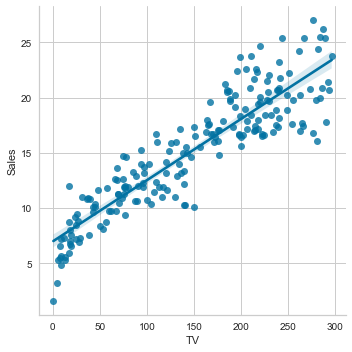

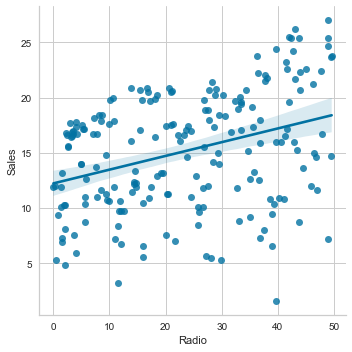

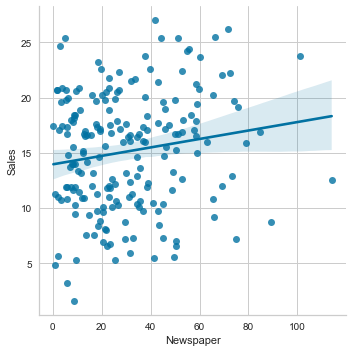

In [249]:
sns.lmplot(x='TV',y='Sales',scatter=True,data=data)

sns.lmplot(x='Radio',y='Sales',scatter=True,data=data)

sns.lmplot(x='Newspaper',y='Sales',scatter=True,data=data)
plt.show();

`Inferences:-`

* For multiple regression we have good linear relation between `TV` ,`Radio`  & 'Sales`
* With `Newspaper` we have a low linear relation with target

#### **1] Selection X & y**

In [250]:
#apply_multiple:

X=data.iloc[:,:2].values
y=data['Sales'].values

In [251]:
data.iloc[:5,:2]

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [252]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [253]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [254]:
lr.fit(X_train,y_train)

LinearRegression()

### **2] Check Regrssion Assumption**


**2.1] homoskedacity** : varriance is kept constant*




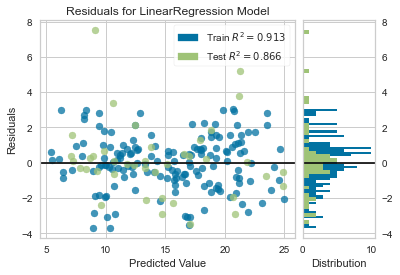

In [255]:
from yellowbrick.regressor import ResidualsPlot
residuals =ResidualsPlot(model)
residuals .fit(X_train,y_train)
residuals .score(X_test,y_test)

plt.legend(loc='upper left')
residuals .show();

**2.1] Normal-Distribution :** 

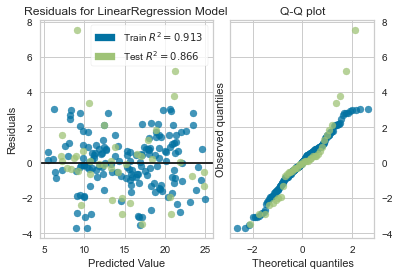

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [256]:
plot_visuals=ResidualsPlot(model,hist=False,qqplot=True)
plot_visuals.fit(X_train,y_train)
plot_visuals.score(X_test,y_test)
plot_visuals.show()

In [257]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

#### 2 ] Performance Matrics

**2.1] Mean Squared Error**

In [258]:
from sklearn.metrics import *
print("Mean_squared_error")
print("For_train :",mean_squared_error(y_train,y_train_pred))
print("For_test:",mean_squared_error(y_test,y_test_pred))
      


Mean_squared_error
For_train : 2.2724752795329852
For_test: 4.47681836620814


**2.2]  r2_score**

In [259]:
from sklearn.metrics import *
Train_score_m=r2_score(y_train,y_train_pred)
Test_score_m=r2_score(y_test,y_test_pred)
print("The r2_score for train :",Train_score_m)
      
print("The r2_score for test :",Test_score_m)

The r2_score for train : 0.9130218535776821
The r2_score for test : 0.8658755781123509


**2.3] Mean Absoluate Error**

In [260]:
print("Mean_squaredAbsoluate_error")
print("For_train :",mean_absolute_error(y_train,y_train_pred))
print("For_test:",mean_absolute_error(y_test,y_test_pred))
      

Mean_squaredAbsoluate_error
For_train : 1.1908262999958539
For_test: 1.40328671368941


### 3] Cross_Validation :

**3.1] CV with Genral**

In [261]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=LinearRegression()
fold=KFold(n_splits=5,shuffle=True, random_state=35)
train_scores=cross_val_score(model,X_train,y_train,scoring='r2',cv=fold)
print("Train_score:",train_scores)

accuracy_fold_train_m=np.mean(abs(train_scores))
print("accuracy_fold_train:",accuracy_fold_train_m)

test_scores=cross_val_score(model,X_test,y_test,scoring='r2',cv=fold)
print("Test_score \n :",test_scores)

accuracy_fold_test_m=np.mean(abs(test_scores))
print("accuracy_fold_test:",accuracy_fold_test_m)

Train_score: [0.91793721 0.9178948  0.86028665 0.90388709 0.92708855]
accuracy_fold_train: 0.9054188583131548
Test_score 
 : [0.78648376 0.90571268 0.79915635 0.78005488 0.97459076]
accuracy_fold_test: 0.8491996846784133


### 4] Regularization

**4.1]Regularization with Lasso**

In [262]:
from sklearn import linear_model

l1=linear_model.Lasso(alpha=1.0,max_iter=200,tol=0.3)
l1.fit(X_train,y_train)

Lasso_test_m=l1.score(X_test,y_test)
Lasso_train_m=l1.score(X_train,y_train)

print("Lasso Regularization Method")

print("lasso_train_score\n{} ".format(Lasso_train_m))
print("lasso_test_score\n {} ".format(Lasso_test_m))

Lasso Regularization Method
lasso_train_score
0.9128416041374184 
lasso_test_score
 0.8662695501956337 


**4.1.1] CV with Lasso**

In [263]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True, random_state=5)
train_scores=cross_val_score(l1,X_train,y_train,scoring='r2',cv=fold)
print("Train_score \n:",train_scores )

lasso_cv_train_m=np.mean(abs(train_scores))
print("  accuracy_fold_train \n:",lasso_cv_train_m)

test_scores=cross_val_score(l1,X_test,y_test,scoring='r2',cv=fold)
print("Test_score \n:",train_scores )


lasso_cv__test_m=np.mean(abs(test_scores))
print("accuracy_fold_test \n :",lasso_cv__test_m)

Train_score 
: [0.86658696 0.89112466 0.89997151 0.91774346 0.94169913]
  accuracy_fold_train 
: 0.9034251437598122
Test_score 
: [0.86658696 0.89112466 0.89997151 0.91774346 0.94169913]
accuracy_fold_test 
 : 0.8439652705233047


**4.2]Regularization with Ridge**

In [264]:
from sklearn import linear_model

l2=linear_model.Ridge(alpha=50,max_iter=200,tol=0.3)
l2.fit(X_train,y_train)

Ridge_test_m=l2.score(X_test,y_test)
Ridge_train_m=l2.score(X_train,y_train)

print("Ridge Regularization Method")

print("Ridge_train_score\n{} ".format(Ridge_train_m))
print("Ridge_test_score\n {} ".format(Ridge_test_m))

Ridge Regularization Method
Ridge_train_score
0.9130216446457542 
Ridge_test_score
 0.8658987436087479 


**4.2.1] CV with Ridge**

In [265]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


train_scores=cross_val_score(l2,X_train,y_train,scoring='r2',cv=fold)
print("Train_score \n:",train_scores )

Ridge_cv_train_m=np.mean(abs(train_scores))
print("  accuracy_fold_train \n:",Ridge_cv_train_m)

test_scores=cross_val_score(l2,X_test,y_test,scoring='r2',cv=fold)
print("Test_score \n:",test_scores )


Ridge_cv_test_m=np.mean(abs(test_scores))
print("accuracy_fold_test \n :",Ridge_cv_test_m)

Train_score 
: [0.86342465 0.89352087 0.89882307 0.91959382 0.94154618]
  accuracy_fold_train 
: 0.9033817158975204
Test_score 
: [0.96284121 0.81397939 0.91964802 0.68960013 0.8324816 ]
accuracy_fold_test 
 : 0.8437100718683196


**4.3]Regularization with Elastic-Net**

In [266]:
from sklearn.linear_model import ElasticNet
l3= ElasticNet(alpha = 1.0,max_iter=100,tol=0.1)
print(l3.fit(X_train, y_train))

Els_train_m=l3.score(X_train,y_train)
Els_test_m=l3.score(X_test,y_test)
print("For_train:",Els_train_m)
print("For_test:",Els_test_m)

ElasticNet(max_iter=100, tol=0.1)
For_train: 0.9129667315333575
For_test: 0.8661405813989943


**4.2.1] Cv with Els**

In [267]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


train_score=cross_val_score(l3,X_train,y_train,cv=fold)
print("Train_score:",train_score)

Els_cv_train_m=np.mean(abs(train_score))
print("K_fold_Train_score:",Els_cv_train_m)

test_score=cross_val_score(l3,X_test,y_test,cv=fold)
print("Test_score:",test_score)

Els_cv_test_m=np.mean(abs(test_score))
print("K_fold_test_score:",Els_cv_test_m)

Train_score: [0.86515855 0.89230223 0.89948342 0.91865108 0.94168332]
K_fold_Train_score: 0.903455721257437
Test_score: [0.96328179 0.81640702 0.91911209 0.68875752 0.83153716]
K_fold_test_score: 0.8438191157455964


In [268]:
#fit model
model.fit(X_train,y_train)
#get prediction for our model
y_test_pred=model.predict(X_test)

#get prediction for lasso
y_test_pred_lasso=l1.predict(X_test)
#get prediction for Ridge
y_test_pred_ridg=l2.predict(X_test)
#get prediction for els
y_test_pred_els=l3.predict(X_test)

Text(0.5, 1.0, 'Elasicnet')

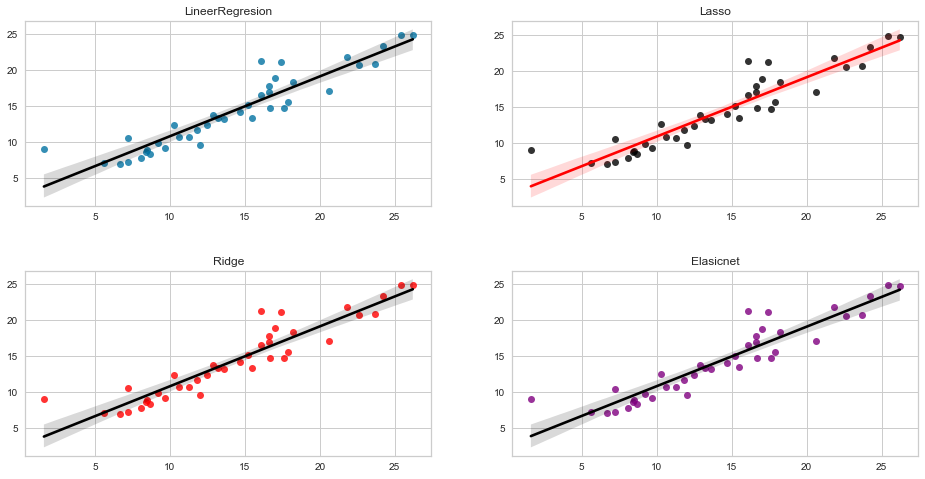

In [269]:
fig, axs = plt.subplots(ncols=2,nrows=2)
fig.set_figheight(8)
fig.set_figwidth(16)
fig.subplots_adjust(hspace=0.35)
sns.regplot(x=y_test,y=y_test_pred,ax=axs[0,0],line_kws={"color":"black"})
axs[0, 0].set_title('LineerRegresion')

sns.regplot(x=y_test,y=y_test_pred_lasso,color="black",ax=axs[0,1],line_kws={"color":"red"})
axs[0,1].set_title('Lasso')
sns.regplot(x=y_test,y=y_test_pred_ridg,color="red",ax=axs[1,0],line_kws={"color":"black"})
axs[1, 0].set_title('Ridge')
sns.regplot(x=y_test,y=y_test_pred_els,color="purple",ax=axs[1,1],line_kws={"color":"black"})
axs[1, 1].set_title('Elasicnet')

In [270]:
print("-"*45)
print("              ALL-RESULTS             ")
print("-"*45)
print("        SINGLE_REGRESSION_RESULTS     "   )
print("-"*45)
print("Train_score\n:-",Train_score_single)
print("Test_score\n:-",Test_score_single)
test=Test_score_single*100
print("-"*45)
print("{}  of the data fit the regression model".format(test))
print("-"*45)
print("CV_Train\n:-",accuracy_fold_train_s)
print("CV_Test\n:-",accuracy_fold_test_s)
print("Lasso_train\n:-",Lasso_train_s)
print("Lasso_test\n:-",Lasso_test_s)
print("Lasso_train_cv\n:-",Lasso_cv_train)
print("Lasso_test_cv\n:-",Lasso_cv_test)
print("Ridge_train\n:-",train_score_L2)
print("Ridge_test\n:-",test_score_L2)

print("Ridge_train_cv\n:-",Ridge_cv_train)
print("Ridge_test_cv\n:-",Ridge_cv_test)
print("ELS_train\n:-",Els_train_s)
print("ELS_test\n:-",Els_test_s)
print("ELS_train_cv\n:-",Els_cv_train)
print("ELS_train_cv\n:-",Els_cv_test)
print("="*45)
print("="*45)
print("       MULTIPLE_REGRESSION_RESULTS      ")
print("-"*45)
print("Train_score_M\n:-",Train_score_m)
print("Test_score_M\n:-",Test_score_m)
test_M=Test_score_m *100
print("-"*45)
print("{}  of the data fit the regression model".format(test_M))
print("-"*45)
print("CV_Train_M\n:-",accuracy_fold_train_m)
print("CV_Test_M\n:-",accuracy_fold_test_m)
print("Lasso_train_M\n:-",Lasso_train_m)
print("Lasso_test_M\n:-",Lasso_test_m)

print("Lasso_train_cv_M\n:-",lasso_cv_train_m)
print("Lasso_test_cv_M\n:-",lasso_cv__test_m)
print("Ridge_train_M\n:-",Ridge_train_m)
print("Ridge_test_M\n:-",Ridge_test_m)
print("Ridge_train_cv_M\n:-",Ridge_cv_train_m)
print("Ridge_test_cv_M\n:-",Ridge_cv_test_m)
print("ELS_train_M\n:-",Els_train_m)
print("ELS_test_M\n:-",Els_test_m)
print("ELS_train_cv_M\n:-",Els_cv_train_m)
print("ELS_test_cv_M\n:-",Els_cv_test_m)
print("*"*40)
print("             Thanku               ")

print("*"*40)

---------------------------------------------
              ALL-RESULTS             
---------------------------------------------
        SINGLE_REGRESSION_RESULTS     
---------------------------------------------
Train_score
:- 0.8134588121404831
Test_score
:- 0.8010943934328407
---------------------------------------------
80.10943934328407  of the data fit the regression model
---------------------------------------------
CV_Train
:- 0.7986409770268039
CV_Test
:- 0.7770559183258372
Lasso_train
:- 0.8001183242090301
Lasso_test
:- 0.7733442561672152
Lasso_train_cv
:- 0.7865563452133757
Lasso_test_cv
:- 0.7744737353253048
Ridge_train
:- 0.8134588105965117
Ridge_test
:- 0.8010889337188476
Ridge_train_cv
:- 0.8017735893673347
Ridge_test_cv
:- 0.768022855351728
ELS_train
:- 0.8097764321565408
ELS_test
:- 0.7894337072055978
ELS_train_cv
:- 0.7957751462975136
ELS_train_cv
:- 0.779506084357729
       MULTIPLE_REGRESSION_RESULTS      
---------------------------------------------
Train_scor

`All-Inferences=-`

**For-single**

`inferences:-`

* we have a good results with single regression but with `Overfitting` 
* with all regularization Technique we obtain a good result with same values  .

**For-Multiple**

`inferences:-`
* it is quite good results in Multiple regression but with `Overfitting` 
* with all regularization Technique we have a good result  but for   `Ridge` Regularization is good  .

`Result:-`

So ,Compairing both regression analysis we are getting good result with multiple regression . 

* Only the `Tv` parameter are not sufficient to explain sales or our target ,to obtain good result we have to consider both `Tv` & `Radio`  for this particular data-set. 